In [169]:
import numpy as np
import pandas as pd

from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV

import time

import scipy.io as sio

### Load dataset

In [115]:
data = sio.loadmat("data\mnist_10digits.mat")
xtrain_u = data["xtrain"]
xtest_u = data["xtest"]

## Scale
xtrain = xtrain_u/255
xtest = xtest_u/255

ytrain = data["ytrain"].reshape(-1,)
ytest = data["ytest"].reshape(-1,)

downsample = 5000
xtrain_ds = xtrain[0:downsample]
ytrain_ds = ytrain[0:downsample]

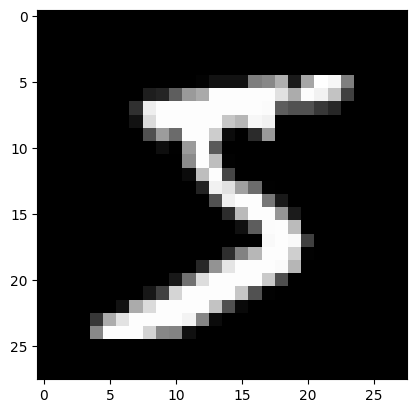

### KNN
https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7

In [116]:
## Tuning KNN

kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(xtrain_ds, ytrain_ds)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 3}


accuracy = 0.9339



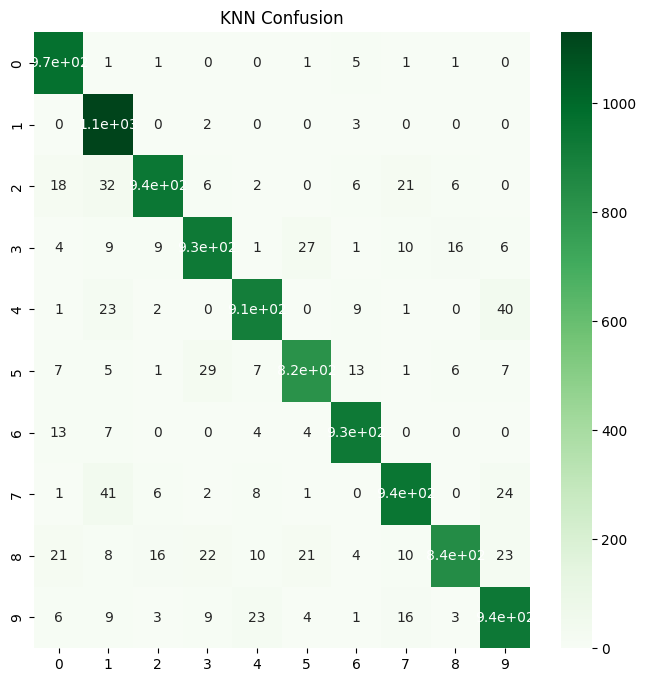

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.931796 & 0.989796 & 0.959921 & 980.000000 \\
1 & 0.893281 & 0.995595 & 0.941667 & 1135.000000 \\
2 & 0.961185 & 0.911822 & 0.935853 & 1032.000000 \\
3 & 0.929789 & 0.917822 & 0.923767 & 1010.000000 \\
4 & 0.942768 & 0.922607 & 0.932578 & 982.000000 \\
5 & 0.933638 & 0.914798 & 0.924122 & 892.000000 \\
6 & 0.956790 & 0.970772 & 0.963731 & 958.000000 \\
7 & 0.940299 & 0.919261 & 0.929661 & 1028.000000 \\
8 & 0.963261 & 0.861396 & 0.909485 & 974.000000 \\
9 & 0.903382 & 0.926660 & 0.914873 & 1009.000000 \\
accuracy & 0.933900 & 0.933900 & 0.933900 & 0.933900 \\
macro avg & 0.935619 & 0.933053 & 0.933566 & 10000.000000 \\
weighted avg & 0.934963 & 0.933900 & 0.933632 & 10000.000000 \\
\bottomrule
\end{tabular}



In [204]:
knn = KNeighborsClassifier(n_neighbors=3).fit(xtrain_ds, ytrain_ds)
ypred_knn = knn.predict(xtest)

acc_knn = sum(ypred_knn == ytest)/len(ytest)
print(f'accuracy = {acc_knn}\n')

conf_knn = confusion_matrix(ytest, ypred_knn)

plt.figure(figsize= (8,8))
sns.heatmap(conf_knn, annot=True, cmap = 'Greens')
plt.title('KNN Confusion')
plt.savefig('images/knn-confusion.png')
plt.show()

knn_classificationreport = pd.DataFrame(classification_report(ytest, ypred_knn, output_dict = True)).transpose()
print(knn_classificationreport.to_latex())

accuracy = 0.9339



## Logistic Regression

In [205]:
## Tuning Parameters
cc = np.linspace(.2,1, 10)
C_dict = dict(C=cc)

In [206]:
logR = LogisticRegression(max_iter=500)
logR_cv=GridSearchCV(logR, C_dict, cv=8)
logR_cv.fit(xtrain_ds, ytrain_ds)
print(logR_cv.best_estimator_.get_params())

{'C': 0.2, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


accuracy = 0.9005

Logistic Confusion Matrix
[[ 942    0    4    3    0    7   14    6    4    0]
 [   0 1102    3    2    1    2    4    2   19    0]
 [   7   11  899   24    9    3   15   16   37   11]
 [   6    1   22  892    1   35    2   16   24   11]
 [   2    3    3    0  907    0   15    4    8   40]
 [   8    2    4   28   17  756   18   12   37   10]
 [  13    3   11    0   25   14  886    4    2    0]
 [   0   14   33    5    5    1    1  923    1   45]
 [   9   11    8   35   13   30   14   16  817   21]
 [  10    7    1   10   53   10    1   30    6  881]]
\begin{tabular}{lrrrrrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\
\midrule
0 & 942 & 0 & 4 & 3 & 0 & 7 & 14 & 6 & 4 & 0 \\
1 & 0 & 1102 & 3 & 2 & 1 & 2 & 4 & 2 & 19 & 0 \\
2 & 7 & 11 & 899 & 24 & 9 & 3 & 15 & 16 & 37 & 11 \\
3 & 6 & 1 & 22 & 892 & 1 & 35 & 2 & 16 & 24 & 11 \\
4 & 2 & 3 & 3 & 0 & 907 & 0 & 15 & 4 & 8 & 40 \\
5 & 8 & 2 & 4 & 28 & 17 & 756 & 18 & 12 & 37 & 10 \\
6 & 13 & 3 & 11 & 0 & 25 & 14

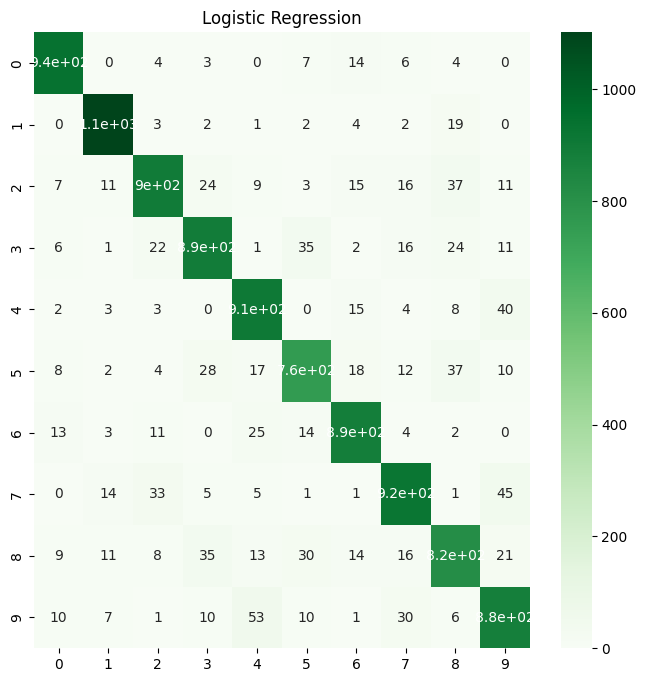

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.944835 & 0.961224 & 0.952959 & 980.000000 \\
1 & 0.954939 & 0.970925 & 0.962866 & 1135.000000 \\
2 & 0.909919 & 0.871124 & 0.890099 & 1032.000000 \\
3 & 0.892893 & 0.883168 & 0.888004 & 1010.000000 \\
4 & 0.879728 & 0.923625 & 0.901143 & 982.000000 \\
5 & 0.881119 & 0.847534 & 0.864000 & 892.000000 \\
6 & 0.913402 & 0.924843 & 0.919087 & 958.000000 \\
7 & 0.896987 & 0.897860 & 0.897423 & 1028.000000 \\
8 & 0.855497 & 0.838809 & 0.847071 & 974.000000 \\
9 & 0.864573 & 0.873142 & 0.868836 & 1009.000000 \\
accuracy & 0.900500 & 0.900500 & 0.900500 & 0.900500 \\
macro avg & 0.899389 & 0.899225 & 0.899149 & 10000.000000 \\
weighted avg & 0.900325 & 0.900500 & 0.900257 & 10000.000000 \\
\bottomrule
\end{tabular}



In [181]:
logR = LogisticRegression(C=.2, penalty ='l2', max_iter=500).fit(xtrain_ds, ytrain_ds)
ypred_logR = logR.predict(xtest)
acc_logR = sum(ypred_logR == ytest)/len(ytest)
print(f'accuracy = {acc_logR}\n')
      
print('Logistic Confusion Matrix')
conf_logR = confusion_matrix(ytest, ypred_logR)
print(conf_logR)
print(pd.DataFrame(conf_logR).to_latex())

plt.figure(figsize= (8,8))
sns.heatmap(conf_logR, annot=True, cmap = 'Greens')
plt.title('Logistic Regression')
plt.savefig('images/logR-confusion.png')
plt.show()

logR_classificationreport = pd.DataFrame(classification_report(ytest, ypred_logR, output_dict = True)).transpose()
print(logR_classificationreport.to_latex())

## SVM - Linear

In [188]:
## Tuning Parameters
cc = np.linspace(.1,1, 10)
C_dict = dict(C=cc)
svmL = SVC(kernel='linear')
svmL_cv=GridSearchCV(svmL, C_dict, cv=8).fit(xtrain_ds,ytrain_ds)
svmL_cv.best_estimator_.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [194]:
svmL_cv.best_estimator_

SVC(C=0.1, kernel='linear')

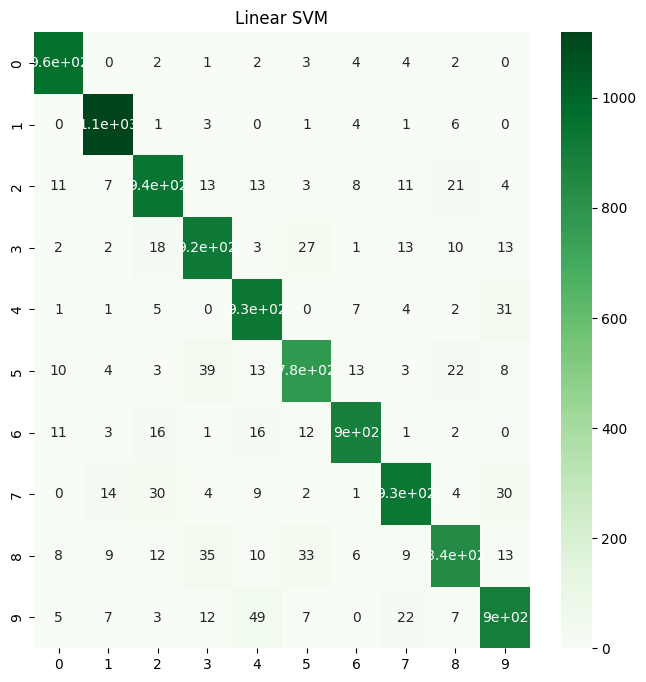

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.952475 & 0.981633 & 0.966834 & 980.000000 \\
1 & 0.959691 & 0.985903 & 0.972621 & 1135.000000 \\
2 & 0.912706 & 0.911822 & 0.912264 & 1032.000000 \\
3 & 0.895044 & 0.911881 & 0.903384 & 1010.000000 \\
4 & 0.890057 & 0.948065 & 0.918146 & 982.000000 \\
5 & 0.898266 & 0.871076 & 0.884462 & 892.000000 \\
6 & 0.953191 & 0.935282 & 0.944152 & 958.000000 \\
7 & 0.932136 & 0.908560 & 0.920197 & 1028.000000 \\
8 & 0.916940 & 0.861396 & 0.888301 & 974.000000 \\
9 & 0.900602 & 0.888999 & 0.894763 & 1009.000000 \\
accuracy & 0.921700 & 0.921700 & 0.921700 & 0.921700 \\
macro avg & 0.921111 & 0.920462 & 0.920512 & 10000.000000 \\
weighted avg & 0.921707 & 0.921700 & 0.921434 & 10000.000000 \\
\bottomrule
\end{tabular}



In [208]:
svmL = svmL_cv.best_estimator_.fit(xtrain_ds, ytrain_ds)
ypred_svmL = svmL.predict(xtest)
conf_svmL = confusion_matrix(ytest, ypred_svmL)

plt.figure(figsize= (8,8))
sns.heatmap(conf_svmL, annot=True, cmap = 'Greens')
plt.title('Linear SVM')
plt.savefig('images/svmL-confusion.png')
plt.show()

svmL_classificationreport = pd.DataFrame(classification_report(ytest, ypred_svmL, output_dict = True)).transpose()
print(svmL_classificationreport.to_latex())


## SVM - Kernel

In [196]:
## Tuning Parameters
cc = np.linspace(1,15,15)
C_dict = dict(C=cc)
svmK = SVC(kernel='rbf')
svmK_cv=GridSearchCV(svmK, C_dict, cv=8).fit(xtrain_ds,ytrain_ds)
svmK_cv.best_estimator_.get_params()

{'C': 4.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

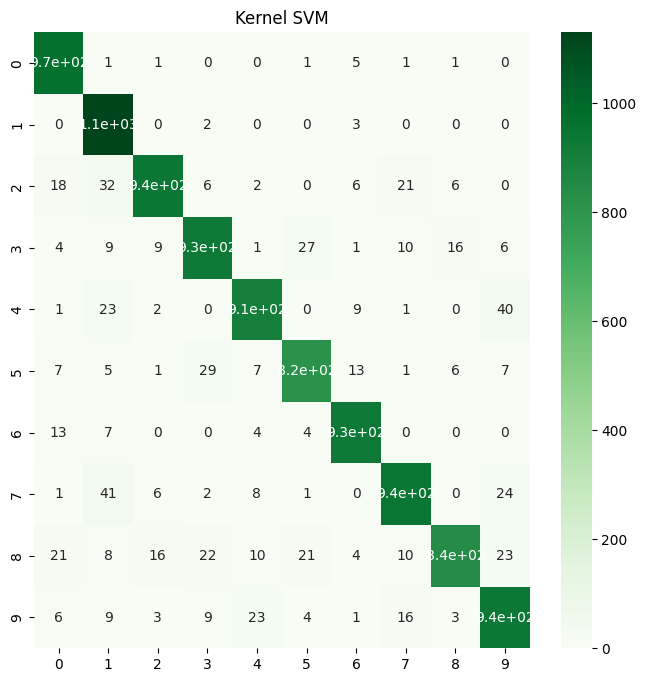

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.931796 & 0.989796 & 0.959921 & 980.000000 \\
1 & 0.893281 & 0.995595 & 0.941667 & 1135.000000 \\
2 & 0.961185 & 0.911822 & 0.935853 & 1032.000000 \\
3 & 0.929789 & 0.917822 & 0.923767 & 1010.000000 \\
4 & 0.942768 & 0.922607 & 0.932578 & 982.000000 \\
5 & 0.933638 & 0.914798 & 0.924122 & 892.000000 \\
6 & 0.956790 & 0.970772 & 0.963731 & 958.000000 \\
7 & 0.940299 & 0.919261 & 0.929661 & 1028.000000 \\
8 & 0.963261 & 0.861396 & 0.909485 & 974.000000 \\
9 & 0.903382 & 0.926660 & 0.914873 & 1009.000000 \\
accuracy & 0.933900 & 0.933900 & 0.933900 & 0.933900 \\
macro avg & 0.935619 & 0.933053 & 0.933566 & 10000.000000 \\
weighted avg & 0.934963 & 0.933900 & 0.933632 & 10000.000000 \\
\bottomrule
\end{tabular}



In [207]:
svmK = svmK_cv.best_estimator_.fit(xtrain_ds, ytrain_ds)
ypred_svmK = knn.predict(xtest)
conf_svmK = confusion_matrix(ytest, ypred_svmK)

plt.figure(figsize= (8,8))
sns.heatmap(conf_svmK, annot=True, cmap = 'Greens')
plt.title('Kernel SVM')
plt.savefig('images/svmK-confusion.png')
plt.show()

svmK_classificationreport = pd.DataFrame(classification_report(ytest, ypred_svmK, output_dict = True)).transpose()
print(svmL_classificationreport.to_latex())

## Neural Network

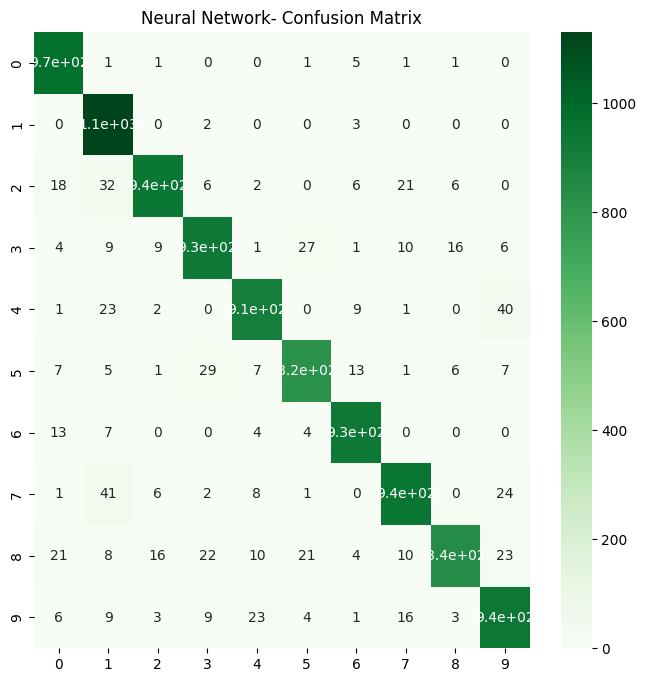

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.967413 & 0.969388 & 0.968400 & 980.000000 \\
1 & 0.978966 & 0.984141 & 0.981547 & 1135.000000 \\
2 & 0.947420 & 0.942829 & 0.945119 & 1032.000000 \\
3 & 0.910318 & 0.934653 & 0.922325 & 1010.000000 \\
4 & 0.957688 & 0.945010 & 0.951307 & 982.000000 \\
5 & 0.937071 & 0.918161 & 0.927520 & 892.000000 \\
6 & 0.957983 & 0.951983 & 0.954974 & 958.000000 \\
7 & 0.958783 & 0.950389 & 0.954568 & 1028.000000 \\
8 & 0.922919 & 0.921971 & 0.922445 & 974.000000 \\
9 & 0.936647 & 0.952428 & 0.944472 & 1009.000000 \\
accuracy & 0.947900 & 0.947900 & 0.947900 & 0.947900 \\
macro avg & 0.947521 & 0.947096 & 0.947268 & 10000.000000 \\
weighted avg & 0.948004 & 0.947900 & 0.947912 & 10000.000000 \\
\bottomrule
\end{tabular}



In [202]:
nn = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=500).fit(xtrain,ytrain)
ypred_nn = nn.predict(xtest)
conf_nn = confusion_matrix(ytest, ypred_svmK)

plt.figure(figsize= (8,8))
sns.heatmap(conf_nn, annot=True, cmap = 'Greens')
plt.title('Neural Network- Confusion Matrix')
plt.savefig('images/nn-confusion.png')
plt.show()

nn_classificationreport = pd.DataFrame(classification_report(ytest, ypred_nn, output_dict = True)).transpose()
print(nn_classificationreport.to_latex())